# Lab 6: Supervised Learning  

In this lab, we will keep working on supervised learning. We will first learn how to train decision trees and we will see that doing this using `sklearn` is not much different from running kNN algorithm.

## Lab 6.A: Decision Trees (50% of grade)

The following code is copied from https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html. You should be able to run the code without error messages.

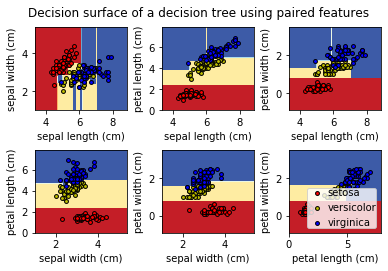

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

**Question 1**. Study the code and try to understand what is happening in each line. Explain what the images plotted by the code show.

**Answer 1**: In the beginning there are standard import statements for the libraries required. `n_classes` is most likely the amount of different flowers (setosa, versicolor, virginica). The images are using different combinations of 2 attributes and then plotting the decisions boundaries for that tree. For example, in the first plot, the attribute used for the x-axis is sepal length and the attribute used for the y-aaxis is sepal width. The algorithm trained based on these two attributes only and then made a decision on each test sample by classifing the flower as either setosa, versicolor, or virginica. 

**Question 2**. Train a decision tree on Iris data set using all 4 attributes. Before training, remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples. Use the default parameter values (no need to put anything in parenthesis in `DecisionTreeClassifier`). How long did it take to train the decision tree? Report the accuracy on the test set. Print the confusion matrix. Report the accuracy on the training set. Discuss if you are seeing any difference and why. Compare the accurracy with the accuracy you got with kNN. Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using `sklearn.tree.export_graphviz`).

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# We take all the features
X = iris.data
y = iris.target
    
#split the train and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

# Train
clf = DecisionTreeClassifier().fit(X_train, y_train)
Z = clf.predict(X_test)
print(Z)

accuracy_train = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)
print("Testing accuracy when using all 4 attributes:", accuracy_test)
print("Training accuracy when using all 4 attributes:", accuracy_train)

confusion_matrix(y_test, Z)


[0 1 0 2 2 2 2 1 2 2 0 0 0 2 1 1 1 1 0 0 2 0 2 1 0 2 1 1 0 0 2 1 2 1 1 2 0
 1 2 2 2 2 1 2 2 0 2 2 0 0]
Testing accuracy when using all 4 attributes: 0.94
Training accuracy when using all 4 attributes: 1.0


array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 19]], dtype=int64)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

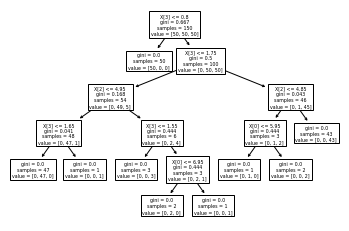

In [27]:
from sklearn import tree

clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

**Answer 2**: The decision tree took very little to train and output the answer. The training accuracy is 100% everytime whereas the testing accuracy moves around 90-98% every time it runs. kNN had an accuracy of about 96% with some fluctuation here and there so I would say the accuracies are pretty similar, but it does seem to me that the decision tree does train faster on my machine. The tree has 6 levels and has 17 nodes in total. 

**Question 3**. Train a decision tree on Iris data, but this time play with the parameters. You can se the detailed list of different choices at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). See if you can find a combination of parameters that improves accuracy on the test set. Report what you found.

[2 0 0 1 1 2 1 0 0 1 0 1 2 1 1 0 0 1 0 1 1 0 0 2 1 0 1 1 2 0 0 2 1 2 2 2 1
 0 0 0 1 0 0 1 0 2 0 1 2 2]
Testing accuracy when using all 4 attributes: 0.96
Training accuracy when using all 4 attributes: 0.99


[Text(167.4, 195.696, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 152.208, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 152.208, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 108.72, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 65.232, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 21.744, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 65.232, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 21.744, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 21.744, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(283.2923076923077, 108.72, 'X[2] <= 4.85\nentropy = 0.151\nsamples = 4

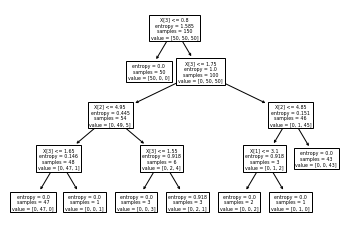

In [8]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=1).fit(X_train, y_train)
Z2 = clf2.predict(X_test)
print(Z2)

accuracy_train = clf2.score(X_train, y_train)
accuracy_test = clf2.score(X_test, y_test)
print("Testing accuracy when using all 4 attributes:", accuracy_test)
print("Training accuracy when using all 4 attributes:", accuracy_train)

clf2 = clf2.fit(iris.data, iris.target)
tree.plot_tree(clf2)

**Answer 3**: When testing the decision tree algorithm with params `criterion='entropy', max_depth=4, min_samples_leaf=1` I found that I was able to maintain consistent 99% accuracy ever time I ran the code cell.

## Lab 6.B. Doing supervised learning on churn data set (50 points)

In this part of the lab, you will be using kNN and decision trees on the problem of churn prediction. 

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# data set is from The Yhat Blog: http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html 
churn_df=pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")
churn_df.head()

<ipython-input-17-a11e7ec5f388>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
print("Column names: {}".format(churn_df.columns.tolist()))

Column names: ['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


This is a dataset from a telecom company, of their customers. Based on the recorded attributes of these customers and their calling plans, we want to predict if a customer is likely to leave the company (the last column in the table). This is expensive for the company, as a lost customer means lost monthly revenue.

**Question 4**. Perform EDA on the data set to get an insight into the data, including answering what fraction of customers left the company, what are attributes about, what are their properties, how are attributes and the churn related. Prepare 1-2 page document summarizing the interesting aspects of the data.

In [3]:
churn_df.shape

(3333, 21)

**Question 5**. Train and test a kNN classifier. First, select 1,000 random customers and save them for testing. You can use the remaining ones for training. Then, you will need to decide what to do with the categorical attributes. The easiest is to simply ignore them, but it would reduce your accuracy. A better way (you have to try it) is to convert the categorical attributes to numbers. It is up to you to decide what distance measure to use, how to pick `k`, and make any other decision that will help you increase the accuracy. For example, it might help you to scale the attributes to the same range. Remember that any transformation you do on the training data needs to be repeated on the test data. Report on the best accuracy you are able to get (please do not forget to split the data into training and test before proceeding). Also report the confusion matrix. Provide a discussion of your choices.

In [28]:
#data pre-processing

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

# Isolate target data
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)

# We don't need these columns
to_drop = ['State','Area Code','Phone','Churn?']
churn_feat_space = churn_df.drop(to_drop,axis=1)

# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Pull out features for future use
features = churn_feat_space.columns

X = churn_feat_space.values.astype(np.float)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=4)

#totals
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


{0: 863, 1: 137}

kNN accuracy for predicting if a costumer will churn is: 88.40%
[[843  96]
 [ 20  41]]


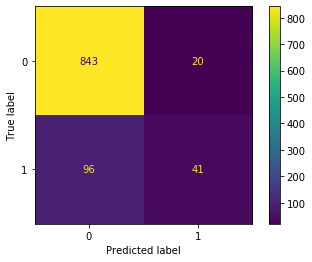

In [93]:
k = 5   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k, algorithm='ball_tree', leaf_size=5)
predictor.fit(X_train, y_train);

Z = predictor.predict(X_test)

accuracy = predictor.score(X_test,y_test)
print("kNN accuracy for predicting if a costumer will churn is: %.2f%%" % (accuracy*100))

#text confusion matrix
print(confusion_matrix(Z, y_test))

#confusion matrix plot
plot_confusion_matrix(predictor, X_test,y_test,values_format='')

**Question 6**. Train and test a decision tree. Do it on the same traing-test split you used in *Question 5*. Your goal is to try to figure out the best way to train an accurate decision tree. Report on your findings. Compare your results with the kNN results.

Testing accuracy 94.10%
Training accuracy 100.00%


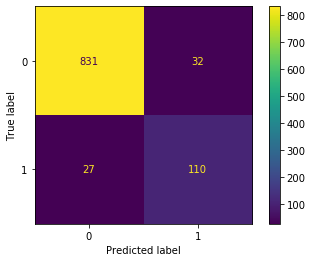

In [199]:
# Train
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, splitter='best', min_impurity_decrease=0).fit(X_train, y_train)
Z = clf.predict(X_test)
#print(Z)

accuracy_train = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)
print("Testing accuracy %.2f%%" % (accuracy_test*100))
print("Training accuracy %.2f%%" % (accuracy_train*100))

confusion_matrix(y_test, Z)
plot_confusion_matrix(clf, X_test,y_test,values_format='')


**Answer 6**: Using a decision tree to as a classifier for this data yields much better results than using kNN. Even though the increase in accuracy is only 5%, I think because of the data shown in the confusion matrix is it much better to use Decision Tree because you are able to predict churn with much higher confidence. The flase negatives are much lower and flase positives are much lower as well.

**Question 7**. Lets assume you have to use your churn classifier to contact your existing customers and try to prevent churn. The cost of each contact is \\$10. Let us assume each contacted customer will decide to stay. Your profit in keeping a customer is \\$30. Given your best decision tree and kNN classifiers, what is the expected profit on your test data? Can you try to train another classifier that would have even larger profit?

**Answer 7**: My kNN classifier has a 88.40% accuracy. However, just knowing the accuracy alone does not actualy give us enough info on churning. The accuracy on predicting a custom will churn is `54/137 = 39.42`. My classifier has 92 false positive cases which means `92 x -10 = -920 dollars` are spent on customers that were not going to churn in the first place so that is wasted money. It also has 83 false negatives in which case we would not spend money in the contact but end up losing the customer `83 x -30 = -2490 dollars`. We predict correctly that 771 customers will not leave so we do not spend moeny on them `771 x 30 = 23,130 dollars` and predict correctly that 54 will churn so on those we have `54 x 20 = 1080 dollars.` The total profit with the kNN classifier is `20,800 dollars`. If we had 100 accuracy we would be able to achieve a profit of `28,630 dollars` so we end up losing `7,830 dollars`.

**Answer 7**: My decision tree classifier has 94.2% accuracy. Furthermore looking at the confusion matrix we have way less flase positives and false negatives. There are 31 cases of false positives where we end up spending unecessary money with contacting the costumer. `32 x -10 = -320 dollars.` There are 27 false negatives where we do not spend contact money but lose the costumer. `27 x -30 = -810 dollars`. We predict correctly that 832 costumers will stay `831 x 30 = 24,930 dollars` and predict correctly that 110 customers will churn so we spend 10 dollars per contact to gain 30 for a net gain of 20 dollars per customer. `110 x 20 = 2,200 dollars.` The total profit with this decision tree classifier is `26,000 dollars`. Using this classifier makes us `5,200` more dollars than the other one.

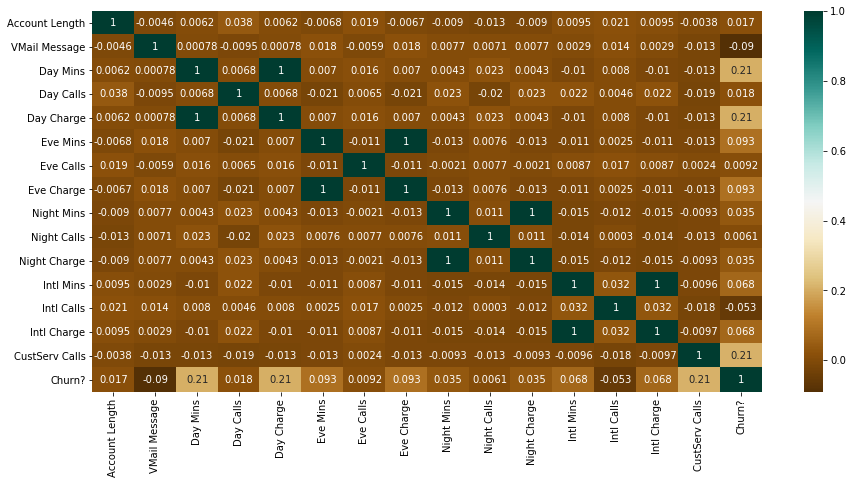

In [45]:


# We don't need these columns
to_drop = ['State','Area Code','Phone']
churn_feat_space = churn_df.drop(to_drop,axis=1)

churn = {'True.': 1, 'False.': 0}
churn_feat_space = churn_feat_space.replace(churn)


plt.figure(figsize=(15,7))
c = churn_feat_space.corr()
sns.heatmap(c, cmap="BrBG",annot=True)


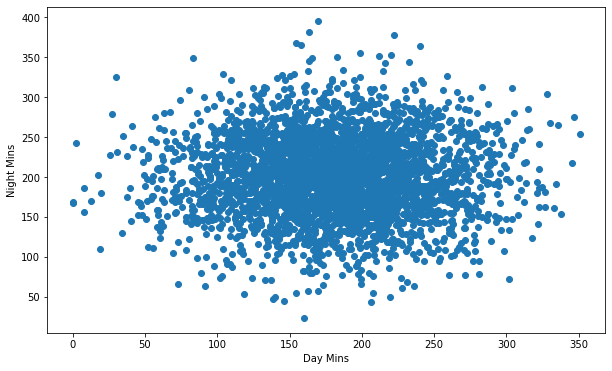

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [56]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(churn_feat_space['Day Mins'], churn_feat_space['Night Mins'])
ax.set_xlabel('Day Mins')
ax.set_ylabel('Night Mins')
plt.show()
churn_feat_space.head()

In [55]:
churn_feat_space.describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


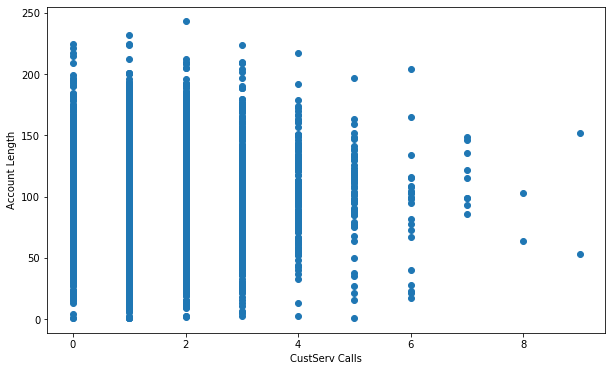

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(churn_feat_space['CustServ Calls'], churn_feat_space['Account Length'])
ax.set_xlabel('CustServ Calls')
ax.set_ylabel('Account Length')
plt.show()

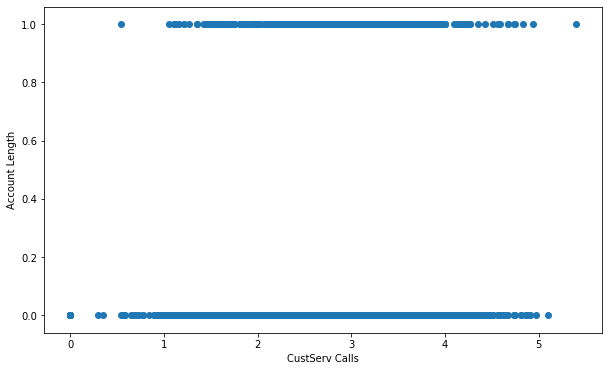

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(churn_feat_space['Intl Charge'], churn_feat_space['Churn?'])
ax.set_xlabel('CustServ Calls')
ax.set_ylabel('Account Length')
plt.show()